# Exploratory Data Analysis of Bank
- Problems:
  1. Apa alasan nasabah ingin berhenti menabung di bank yang bersangkutan?
  2. Apakah **kepemilikan CC** mempengaruhi pemberhentian rekening?
  3. Apa pengaruh **CreditScore** terhadap pemberhentian rekening?
  3. Apakah **Tenure** mempengaruhi terhadap pemberhentian rekening?
  5. Apakah **NumOfProducts** mempengaruhi terhadap pemberhentian rekening?

- Goals:
  1. Menilai pelayanan bank dari loyalitas nasabah.
  2. Menemukan alasan nasabah yang keluar ke bank lain.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
bank = pd.read_csv("bank.csv", usecols = [1,2,3,4,5,6,7,8,9,10,11,12,13])
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analisa Deskriptif dan Handling Missing Value serta Outliers

## Analisa Deskriptif

In [16]:
bank_descr = []
j = 0
for name in bank.columns:
  bank_descr.append(
      [
       name,
       bank[name].dtypes,
       bank[name].isnull().sum(),
       round(bank[name].isnull().sum()/len(bank)*100, 2),
       bank[name].nunique(),
       bank[name].drop_duplicates().sample(2).values
       ]
       )
  j += 1

bank_column_desc = pd.DataFrame(bank_descr, columns = ['Column Name', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique Sample'])
print(f"Total kolom dan baris dari dataset ini adalah: {len(bank.columns)} kolom dan {len(bank)} baris.")

Total kolom dan baris dari dataset ini adalah: 13 kolom dan 10000 baris.


In [12]:
bank_column_desc

# setelah melihat keterangan tiap kolom:
  # dtype kolom memiliki tipe yang sesuai dengan kontennya. Terdiri dari:
    # int64
    # float64
    # object
  # masing-masing kolom tidak memiliki NULL value
  # terdapat 6 kolom dengan data numerik:
    # CustomerId
    # CreditScore
    # Age
    # Tenure
    # Balance
    # EstimatedSalary
  # terdapat 7 kolom dengan data kategorik:
    # Surname
    # Geography
    # Gender
    # NumOfProducts
    # HasCrCard
    # IsActiveMember
    # Exited
  # meski Exited, IsActiveMember, HasCrCard memiliki tipe data int64, namun maksud dari kolom tersebut adalah "Yes" dan "No" yang direpresentasikan menggunakan angka biner.
# memiliki 13 kolom
# memiliki 10000 baris

,Column Name,Dtype,Null,Null (%),nUnique,Unique Sample
0,CustomerId,int64,0,0.0,10000,"[15674750, 15700394]"
1,Surname,object,0,0.0,2932,"[Sandefur, Raynor]"
2,CreditScore,int64,0,0.0,460,"[493, 546]"
3,Geography,object,0,0.0,3,"[Germany, France]"
4,Gender,object,0,0.0,2,"[Female, Male]"
5,Age,int64,0,0.0,70,"[75, 18]"
6,Tenure,int64,0,0.0,11,"[3, 8]"
7,Balance,float64,0,0.0,6382,"[125396.24, 124425.99]"
8,NumOfProducts,int64,0,0.0,4,"[3, 2]"
9,HasCrCard,int64,0,0.0,2,"[0, 1]"


## Handling Missing Values

In [18]:
bank_column_desc

# berdasarkan deskripsi kolom, dataset ini tidak memiliki NULL values pada masing-masing kolom

,Column Name,Dtype,Null,Null (%),nUnique,Unique Sample
0,CustomerId,int64,0,0.0,10000,"[15677939, 15781989]"
1,Surname,object,0,0.0,2932,"[Heydon, Wan]"
2,CreditScore,int64,0,0.0,460,"[716, 573]"
3,Geography,object,0,0.0,3,"[Germany, Spain]"
4,Gender,object,0,0.0,2,"[Female, Male]"
5,Age,int64,0,0.0,70,"[27, 47]"
6,Tenure,int64,0,0.0,11,"[2, 10]"
7,Balance,float64,0,0.0,6382,"[131286.46, 90305.76]"
8,NumOfProducts,int64,0,0.0,4,"[4, 2]"
9,HasCrCard,int64,0,0.0,2,"[1, 0]"


## Outliers

### Generally

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

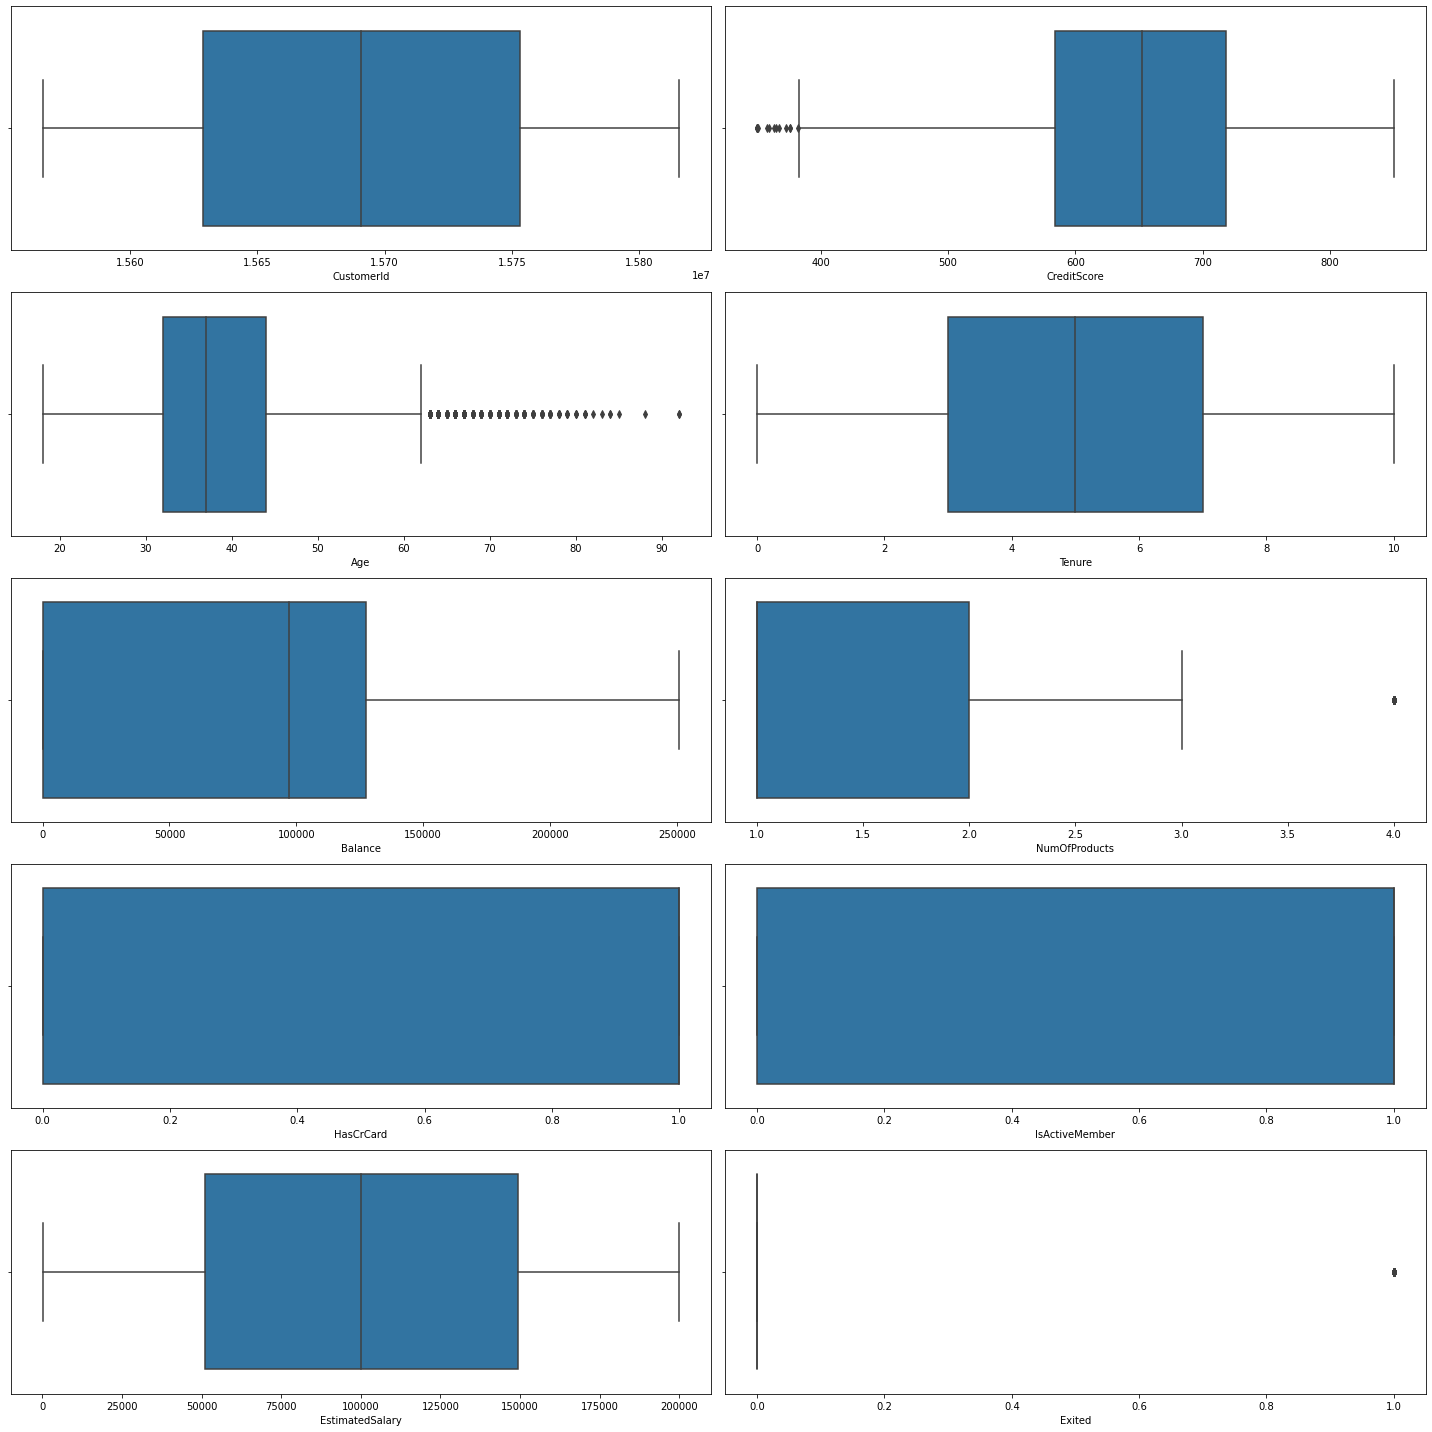

In [20]:
plt.figure(figsize = (20, 20))

x = 1
for column in bank.describe().columns:
    plt.subplot(5, 2, x)
    sns.boxplot(bank[column])
    x += 1
    plt.tight_layout()

# kita melihat bahwa sebagian besar kolom memiliki data outliers.
# namun kolom yang tidak memiliki outliers adalah:
# is_canceled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, arrival_month, arrival_year

### Specifically

In [ ]:
# CreditScore, Age, NumOfProducts,Exited

#### CreditScore

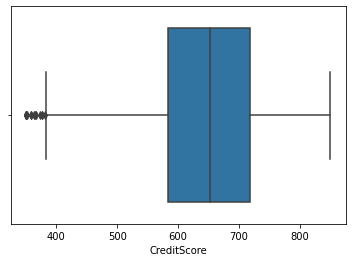

In [25]:
sns.boxplot(x = 'CreditScore', data = bank)
plt.show()

# terdapat outliers di bagian bawah

In [27]:
# Data-data yang menjadi Outliers pada kolom CreditScore

Q1_CS = bank.describe()['CreditScore']['25%']
Q3_CS = bank.describe()['CreditScore']['75%']
IQR_CS = Q3_CS - Q1_CS
UpFence_CS = Q3_CS + (1.5 * IQR_CS)
LoFence_CS = Q1_CS - (1.5 * IQR_CS)

bank[(bank['CreditScore'] < LoFence_CS) | (bank['CreditScore'] > UpFence_CS)]

# ternyata terdapat 15 rows yang termasuk outliers pada kolom CreditScore

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [45]:
print(f"Outliers pada kolom CreditScore adalah data-data yang nilainya lebih kecil dari nilai {int(LoFence_CS)}.")
print(f"Jumlah data yang termasuk outliers pada kolom CreditScore adalah {len(bank[(bank['CreditScore'] < LoFence_CS) | (bank['CreditScore'] > UpFence_CS)])} baris.")
print("Menariknya, semua nasabah yang termasuk outliers pada kolom CreditScore adalah nasabah yang memberhentikan rekeningnya dan pindah ke bank lainnya.")

Outliers pada kolom CreditScore adalah data-data yang nilainya lebih kecil dari nilai 383.
Jumlah data yang termasuk outliers pada kolom CreditScore adalah 15 baris.
Menariknya, semua nasabah yang termasuk outliers pada kolom CreditScore adalah nasabah yang memberhentikan rekeningnya dan pindah ke bank lainnya.


#### Age

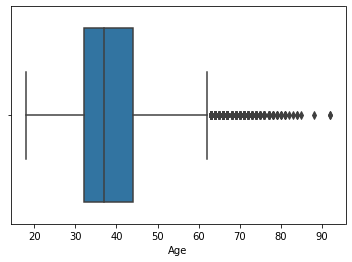

In [36]:
sns.boxplot(x = 'Age', data = bank)
plt.show()

# terdapat outliers di bagian bawah

In [37]:
# Data-data yang menjadi Outliers pada kolom Age

Q1_Age = bank.describe()['Age']['25%']
Q3_Age= bank.describe()['Age']['75%']
IQR_Age = Q3_Age - Q1_Age
UpFence_Age = Q3_Age + (1.5 * IQR_Age)
LoFence_Age = Q1_Age - (1.5 * IQR_Age)

bank[(bank['Age'] < LoFence_Age) | (bank['Age'] > UpFence_Age)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [46]:
print(f"Outliers pada kolom Age adalah data-data yang nilainya lebih besar dari nilai {int(UpFence_Age)}.")
print(f"Jumlah data yang termasuk outliers pada kolom Age adalah {len(bank[(bank['Age'] < LoFence_Age) | (bank['Age'] > UpFence_Age)])} baris.")

Outliers pada kolom Age adalah data-data yang nilainya lebih besar dari nilai 62.
Jumlah data yang termasuk outliers pada kolom Age adalah 359 baris.


#### NumOfProducts

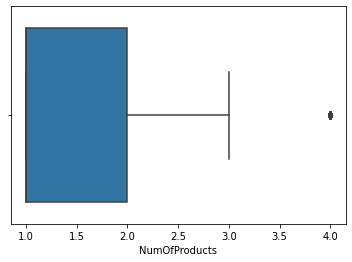

In [41]:
sns.boxplot(x = 'NumOfProducts', data = bank)
plt.show()

# terdapat outliers di bagian bawah

In [42]:
# Data-data yang menjadi Outliers pada kolom NumOfProducts

Q1_NOP = bank.describe()['NumOfProducts']['25%']
Q3_NOP= bank.describe()['NumOfProducts']['75%']
IQR_NOP = Q3_NOP - Q1_NOP
UpFence_NOP = Q3_NOP + (1.5 * IQR_NOP)
LoFence_NOP = Q1_NOP - (1.5 * IQR_NOP)

bank[(bank['NumOfProducts'] < LoFence_NOP) | (bank['NumOfProducts'] > UpFence_NOP)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,15670374,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,15625824,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,15664754,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,15603851,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,15791700,Ugochukwutubelum,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,15783615,Ramos,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [48]:
print(f"Outliers pada kolom NumOfProducts adalah data-data yang nilainya lebih besar dari nilai {int(UpFence_NOP)}.")
print(f"Jumlah data yang termasuk outliers pada kolom NumOfProducts adalah {len(bank[(bank['NumOfProducts'] < LoFence_NOP) | (bank['NumOfProducts'] > UpFence_NOP)])} baris.")
print("Menariknya, semua nasabah yang termasuk outliers pada kolom NumOfProducts adalah nasabah yang memberhentikan rekeningnya dan pindah ke bank lainnya.")

Outliers pada kolom NumOfProducts adalah data-data yang nilainya lebih besar dari nilai 3.
Jumlah data yang termasuk outliers pada kolom NumOfProducts adalah 60 baris.
Menariknya, semua nasabah yang termasuk outliers pada kolom NumOfProducts adalah nasabah yang memberhentikan rekeningnya dan pindah ke bank lainnya.


#### Exited

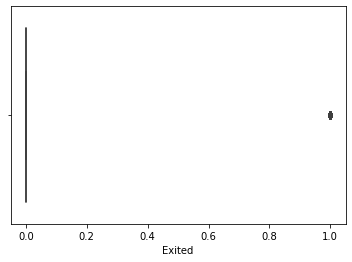

In [51]:
sns.boxplot(x = 'Exited', data = bank)
plt.show()

# terdapat outliers di bagian bawah

In [49]:
# Data-data yang menjadi Outliers pada kolom Exited

Q1_Exit = bank.describe()['Exited']['25%']
Q3_Exit= bank.describe()['Exited']['75%']
IQR_Exit = Q3_Exit - Q1_Exit
UpFence_Exit = Q3_Exit + (1.5 * IQR_Exit)
LoFence_Exit = Q1_Exit - (1.5 * IQR_Exit)

bank[(bank['Exited'] < LoFence_Exit) | (bank['Exited'] > UpFence_Exit)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [54]:
print(f"Outliers pada kolom Exited adalah data-data yang nilainya lebih besar dari nilai {int(UpFence_Exit)}.")
print(f"Jumlah data yang termasuk outliers pada kolom Exited adalah {len(bank[(bank['Exited'] < LoFence_Exit) | (bank['Exited'] > UpFence_Exit)])} baris.")
print(f"Data outliers ini hanya {round(len(bank[(bank['Exited'] < LoFence_Exit) | (bank['Exited'] > UpFence_Exit)])/len(bank)*100, 2)}% dari keseluruhan baris di dataset ini.")

Outliers pada kolom Exited adalah data-data yang nilainya lebih besar dari nilai 0.
Jumlah data yang termasuk outliers pada kolom Exited adalah 2037 baris.
Data outliers ini hanya 20.37% dari keseluruhan baris di dataset ini.


# Analisis Data

## Univariate

In [55]:
# numerikal
bank.describe()

# Rata-rata CreditScore nasabah adalah 650,5. Rentang score-nya adalah 350 hingga 850 poin.
# Rata-rata nasabah berusia 39 tahun. Rentang usia nasabah pada bank ini adalah umur 18 hingga 92 tahun.
# Rata-rata tenor yang diberikan ke nasabah oleh bank adalah 5 tahun, meski tenor paling tinggi adalah 10 tahun.
# Rata-rata saldo nasabah adalah 76ribu satuan mata uang.
# Minimal nasabah memiliki 1 produk bank, namun ada juga yang memiliki 4 produk.
# Rata-rata gaji nasabah pada bank ini adalah 100ribu satuan mata uang. Namun ada juga nasabah yang penghasilannya 11 satuan mata uang.

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [57]:
# kategorikal
bank.describe(include = 'O')

# Ada 32 nasabah bernama "Smith" di bank ini
# Negara paling banyak yang menjadi nasabah di bank ini adalah France sebanyak 5014 nasabah
# Laki-laki (Male) adalah nasabah paling banyak dengan 5457 orang.

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [58]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
import sidetable

In [69]:
# 10 Nama yang sering digunakan saat mendaftarkan diri menjadi nasabah pada bank ini

bank.stb.freq(['Surname']).head(10)

# nama surname 'Smith' ada di bank ini sebanyak 0.32%

,Surname,count,percent,cumulative_count,cumulative_percent
0,Smith,32,0.32,32,0.32
1,Scott,29,0.29,61,0.61
2,Martin,29,0.29,90,0.90
3,Walker,28,0.28,118,1.18
4,Brown,26,0.26,144,1.44
5,Yeh,25,0.25,169,1.69
6,Shih,25,0.25,194,1.94
7,Genovese,25,0.25,219,2.19
8,Wright,24,0.24,243,2.43
9,Maclean,24,0.24,267,2.67


In [70]:
# Negara yang menjadi nasabah pada bank ini

bank.stb.freq(['Geography'])

# Nasabah yang berasal dari Perancis mendominasi bank ini sebesar 50%

,Geography,count,percent,cumulative_count,cumulative_percent
0,France,5014,50.14,5014,50.14
1,Germany,2509,25.09,7523,75.23
2,Spain,2477,24.77,10000,100.00


In [71]:
# Jenis kelamin yang menjadi nasabah pada bank ini

bank.stb.freq(['Gender'])

# Nasabah dengan jenis kelamin Pria mendominasi bank ini sebanyak 54%

,Gender,count,percent,cumulative_count,cumulative_percent
0,Male,5457,54.57,5457,54.57
1,Female,4543,45.43,10000,100.00


In [72]:
# Durasi tenor pinjaman yang diberikan kepada nasabah pada bank ini

bank.stb.freq(['Tenure'])

# sebanyak 10,5% nasabah diberikan pinjaman dengan tenor 2 tahun
# Nasabah yang diberikan pinjaman dengan tenor 10 tahun hanya sebesar 4,9%

,Tenure,count,percent,cumulative_count,cumulative_percent
0,2,1048,10.48,1048,10.48
1,1,1035,10.35,2083,20.83
2,7,1028,10.28,3111,31.11
3,8,1025,10.25,4136,41.36
4,5,1012,10.12,5148,51.48
5,3,1009,10.09,6157,61.57
6,4,989,9.89,7146,71.46
7,9,984,9.84,8130,81.30
8,6,967,9.67,9097,90.97
9,10,490,4.90,9587,95.87


In [73]:
# Jenis produk yang dimiliki nasabah pada bank ini

bank.stb.freq(['NumOfProducts'])

# sebanyak 50,8% nasabah hanya memiliki 1 produk bank

,NumOfProducts,count,percent,cumulative_count,cumulative_percent
0,1,5084,50.84,5084,50.84
1,2,4590,45.90,9674,96.74
2,3,266,2.66,9940,99.40
3,4,60,0.60,10000,100.00


In [75]:
# Jumlah nasabah yang memiliki kartu kredit pada bank ini

bank.stb.freq(['HasCrCard'])

# didominasi oleh nasabah yang punya kartu kredit sebanyak 70%

,HasCrCard,count,percent,cumulative_count,cumulative_percent
0,1,7055,70.55,7055,70.55
1,0,2945,29.45,10000,100.00


In [78]:
# Keaktifan nasabah pada bank ini

bank.stb.freq(['IsActiveMember'])

# Sebanyak 51% nasabah di bank ini merupakan nasabah yang masih aktif

,IsActiveMember,count,percent,cumulative_count,cumulative_percent
0,1,5151,51.51,5151,51.51
1,0,4849,48.49,10000,100.00


In [77]:
# Jumlah nasabah yang belum ataupun sudah berhenti kemudian pindah dari bank ini

bank.stb.freq(['Exited'])

# sebanyak 79% nasabah masih tetap pada bank ini

,Exited,count,percent,cumulative_count,cumulative_percent
0,0,7963,79.63,7963,79.63
1,1,2037,20.37,10000,100.00


## Multivariate

In [79]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
(pd.crosstab(bank['Exited'], bank['HasCrCard'], normalize = 'columns')*100).round(2)

# Sebanyak 80% nasabah memiliki kartu kredit namun tidak meninggalkan bank ini
# 79% nasabah yang memiliki kartu kredit, tidak meninggalkan bank ini
# bank ini menjaga nasabahnya dengan baik

# Nasabah yang memiliki kartu kredit memiliki kecenderungan untuk tidak berpindah dari bank ini

HasCrCard,0,1
Exited,,
0,79.19,79.82
1,20.81,20.18


In [90]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    (credits to pandas docstring)
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

((pd.crosstab(bank['Exited'], bank['CreditScore'], normalize = 'columns')*100).round(2)).style.apply(highlight_max)

# credit score mulai dengan 475 ke bawah (nilai 300an) cenderung berhenti dan pindah dari bank ini
# nasabah dengan credit score tinggi (di atas 470) cenderung tidak meninggalkan dan pindah dari bank ini
  # hanya nasabah dengan credit score 475 dan 839

# nasabah dengan credit score rendah (di bawah 470) memiliki kecenderungan untuk berpindah dari bank ini

CreditScore,350,351,358,359,363,365,367,373,376,382,383,386,395,399,401,404,405,407,408,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850
Exited,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,66.670000,100.000000,100.000000,100.000000,50.000000,66.670000,100.000000,100.000000,83.330000,100.000000,33.330000,66.670000,100.000000,0.000000,100.000000,75.000000,100.000000,100.000000,66.670000,100.000000,66.670000,80.000000,60.000000,100.000000,50.000000,60.000000,50.000000,83.330000,66.670000,85.710000,100.000000,100.000000,100.000000,50.000000,66.670000,83.330000,80.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,75.000000,100.000000,80.000000,85.710000,100.000000,40.000000,50.000000,87.500000,100.000000,100.000000,100.000000,77.780000,60.000000,50.000000,90.910000,57.140000,100.000000,100.000000,100.000000,87.500000,77.780000,33.330000,75.000000,69.230000,57.140000,70.590000,66.670000,80.000000,66.670000,71.430000,81.820000,91.670000,88.890000,78.570000,100.000000,75.000000,84.620000,80.000000,80.000000,83.330000,92.310000,75.000000,75.000000,80.000000,76.470000,80.000000,81.820000,94.740000,78.570000,100.000000,64.290000,80.000000,93.750000,83.330000,93.750000,92.310000,71.430000,68.750000,83.330000,76.470000,72.730000,68.750000,76.670000,54.550000,80.000000,78.570000,77.780000,80.770000,88.890000,80.950000,68.420000,78.950000,78.260000,80.000000,81.820000,76.670000,84.210000,80.950000,61.540000,63.640000,73.680000,65.520000,78.570000,71.430000,80.000000,84.000000,87.500000,92.860000,73.910000,87.100000,76.000000,70.830000,61.110000,63.640000,80.950000,75.000000,77.420000,71.430000,70.590000,83.330000,80.490000,79.310000,70.370000,85.7100

In [91]:
(pd.crosstab(bank['Exited'], bank['Tenure'], normalize = 'columns')*100).round(2)

# Persentase nasabah yang diberikan pinjaman selalu lebih besar untuk menetap dibandingkan nasabah yang ingin pindah, baik durasinya dalam bulanan maupun 10 tahun.
# Nasabah yang diberikan pinjaman tidak meninggalkan bank ini

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,77.0,77.58,80.82,78.89,79.47,79.35,79.73,82.78,80.78,78.35,79.39
1,23.0,22.42,19.18,21.11,20.53,20.65,20.27,17.22,19.22,21.65,20.61


In [97]:
(pd.crosstab(bank['Exited'], bank['NumOfProducts'], normalize = 'columns')*100).round(2)

# Nasabah yang hanya memiliki paling banyak 2 produk bank, cenderung tinggal tetap
# Malahan nasabah yang memiliki banyak produk cenderung pindah bank
  # sebanyak 83% nasabah yang memiliki 3 produk bank malah pindah
  # dan seluruh nasabah yang memiliki 4 produk bank sudah pasti pindah.

# Nasabah yang memiliki banyak produk cenderung pindah bank

NumOfProducts,1,2,3,4
Exited,,,,
0,72.29,92.42,17.29,0.0
1,27.71,7.58,82.71,100.0


In [98]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
(pd.crosstab(bank['Exited'], bank['Age'], normalize = 'columns')*100).round(2).style.apply(highlight_max)

# usia tidak mempengaruhi pindah atau tidaknya nasabah

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,88,92
Exited,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,90.910000,96.300000,95.000000,94.340000,85.710000,93.940000,89.390000,96.100000,93.000000,93.780000,91.580000,91.950000,92.660000,91.830000,92.340000,90.050000,92.620000,87.970000,88.380000,87.030000,86.790000,82.980000,79.400000,81.150000,76.010000,70.370000,71.600000,62.010000,59.730000,56.000000,52.380000,48.980000,47.010000,44.540000,37.250000,45.950000,39.290000,41.460000,28.570000,49.330000,56.720000,51.610000,48.390000,60.380000,59.620000,55.000000,67.570000,55.560000,80.000000,86.490000,68.420000,90.910000,77.780000,74.070000,95.240000,92.310000,94.440000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,100.000000
1,9.090000,3.700000,5.000000,5.660000,14.290000,6.060000,10.610000,3.900000,7.000000,6.220000,8.420000,8.050000,7.340000,8.170000,7.660000,9.950000,7.380000,12.030000,11.620000,12.970000,13.210000,17.020000,20.600000,18.850000,23.990000,29.630000,28.400000,37.990000,40.270000,44.000000,47.620000,51.020000,52.990000,55.460000,62.750000,54.050000,60.710000,58.540000,71.430000,50.670000,43.280000,48.390000,51.610000,39.620000,40.380000,45.000000,32.430000,44.440000,20.000000,13.510000,31.580000,9.090000,22.220000,25.930000,4.760000,7.690000,5.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000


In [104]:
(pd.crosstab(bank['Exited'], bank['IsActiveMember'], normalize = 'columns')*100).round(2)

# Aktif atau tidaknya seorang nasabah tidak mempengaruhi pindahnya nasabah.
# Sebanyak 73% nasabah yang tidak aktif terbukti tidak pindah
# Sebanyak 85% nasabah yang aktif pun terbukti tidak pindah

IsActiveMember,0,1
Exited,,
0,73.15,85.73
1,26.85,14.27


# Visualisasi Data

## Univariate

In [141]:
exit = bank[bank['Exited'] == 1]
no_exit = bank[bank['Exited'] == 0]

In [112]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


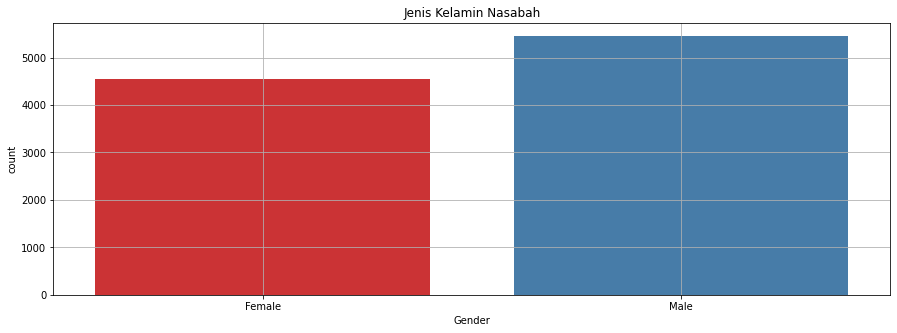

In [126]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Gender', data = bank, palette = 'Set1')
plt.title("Jenis Kelamin Nasabah")
plt.grid(True)
plt.show()

# Laki-laki sebagai nasabah mendominasi bank ini

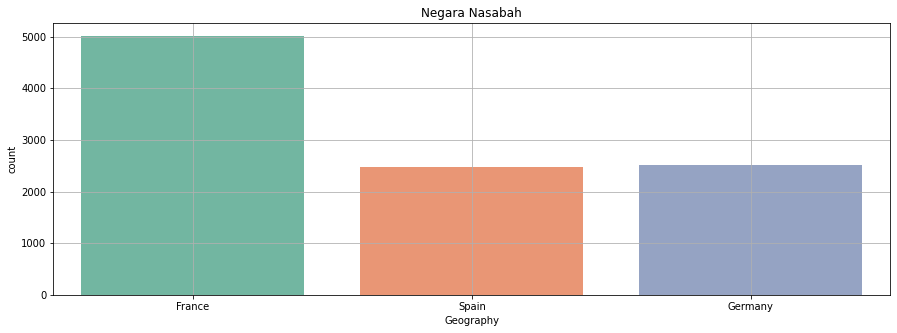

In [120]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Geography', data = bank, palette = 'Set2')
plt.title("Negara Nasabah")
plt.grid(True)
plt.show()

# Perancis adalah negara yang paling banyak diisi sebagai data nasabah

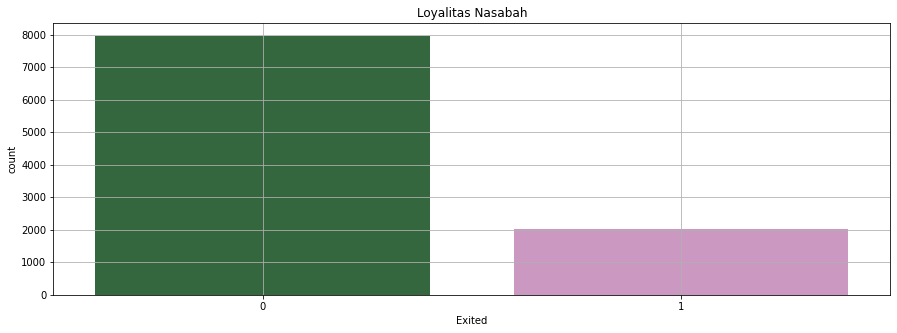

In [124]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Exited', data = bank, palette = 'cubehelix')
plt.title("Loyalitas Nasabah")
plt.grid(True)
plt.show()

# Terlihat jauh lebih banyak nasabah yang loyal dibandingkan yang pindah

In [127]:
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


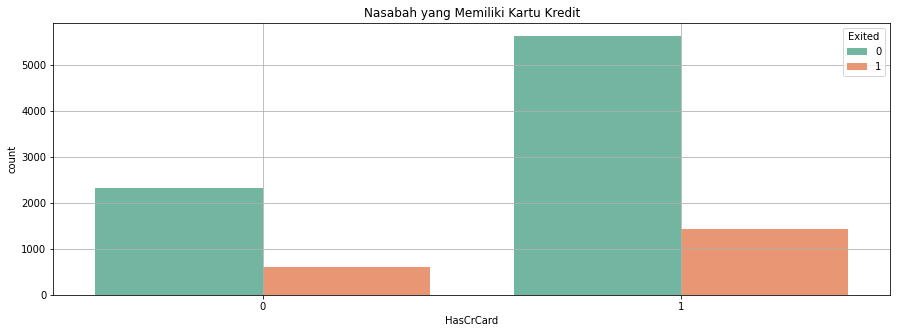

In [130]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'HasCrCard', data = bank, palette = 'Set2', hue = 'Exited')
plt.title("Nasabah yang Memiliki Kartu Kredit")
plt.grid(True)
plt.show()

# Terlihat jelas nasabah yang punya maupun tidak, nasabahnya tetap tinggal

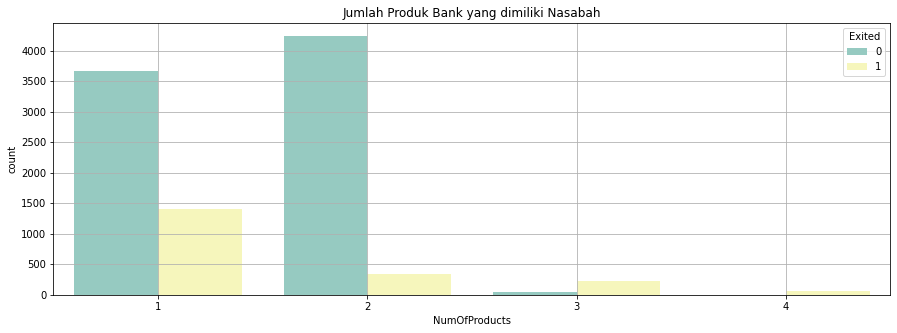

In [133]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'NumOfProducts', data = bank, palette = 'Set3', hue = 'Exited')
plt.title("Jumlah Produk Bank yang dimiliki Nasabah")
plt.grid(True)
plt.show()

# Terlihat jelas nasabah yang memiliki lebih dari 2 produk bank cenderung pindah

## Multivariate

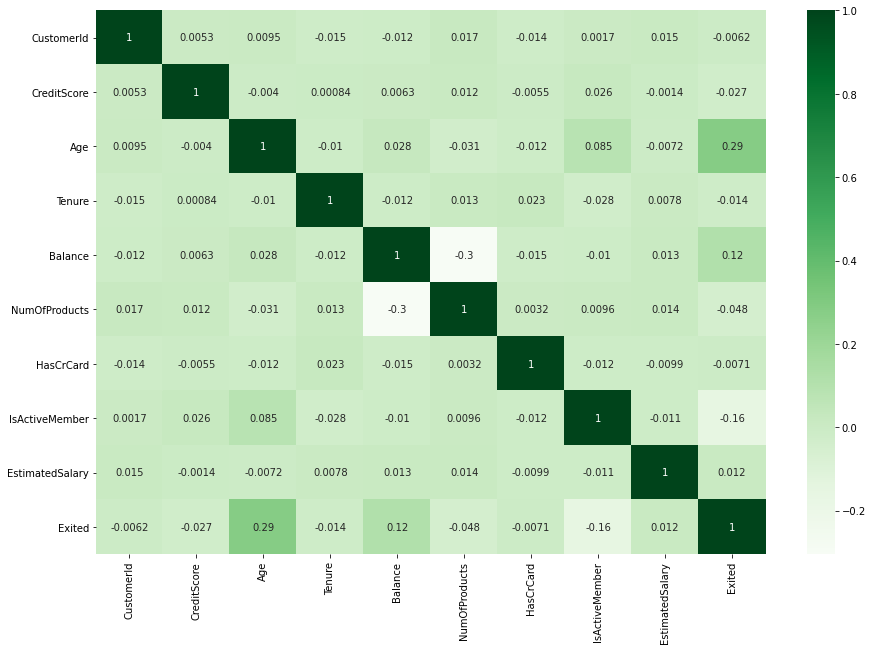

In [111]:
plt.figure(figsize = (15,10))
sns.heatmap(bank.corr(), cmap = 'Greens', annot = True)
plt.show()

# korelasi antar kolom memiliki nilai yang rendah.
# hanya kolom 'Age' dengan 'Exited' yang nilai korelasinya tinggi

In [143]:
exit.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


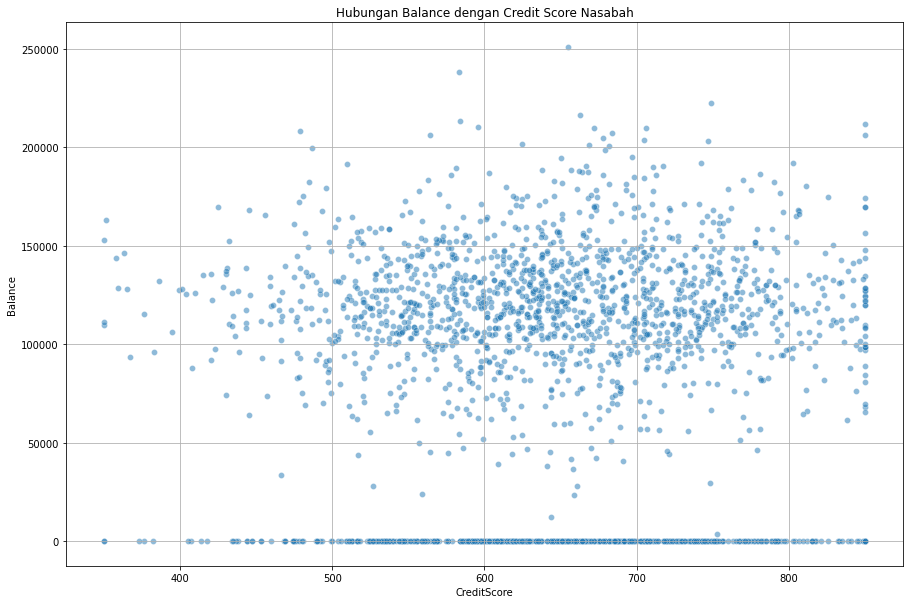

In [164]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'CreditScore', y = 'Balance', data = exit, alpha = 0.5)
plt.title("Hubungan Balance dengan Credit Score Nasabah")
plt.grid(True)
plt.show()

# hubungannya cenderung tidak tinggi, hanya di garis rata-rata

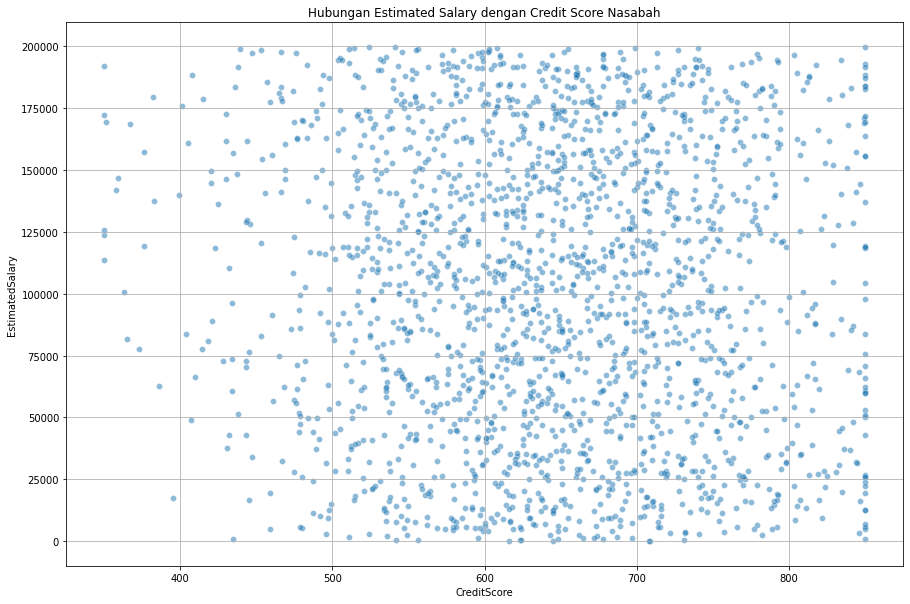

In [167]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'CreditScore', y = 'EstimatedSalary', data = exit, alpha = 0.5)
plt.title("Hubungan Estimated Salary dengan Credit Score Nasabah")
plt.grid(True)
plt.show()

# tidak berhubungan, karena penyebaran datanya terlalu luas dan tidak membentuk garis lurus.

# Kesimpulan
1. Kepemilikan kartu kredit tidak mempengaruhi nasabah berpindah dari bank.
  - Sebanyak 80% nasabah yang memiliki kartu kredit adalah nasabah yang tidak pindah
  - 79% nasabah yang memiliki kartu kredit, tidak meninggalkan bank
2. Durasi tenor pinjaman dari bank ke nasabah tidak mempengaruhi nasabah untuk pindah ke bank lain. Baik durasinya dalam bulanan maupun 10 tahun, persentase nasabah yang tidak pindah tetap jauh lebih besar daripada nasabah yang pindah.
3. Usia nasabah sangat tidak mempengaruhi nasabah berpindah dari bank.
4. Aktif atau tidaknya seorang nasabah tidak mempengaruhi pindahnya nasabah.
  - Sebanyak 73% nasabah yang tidak aktif terbukti tidak pindah
  - Sebanyak 85% nasabah yang aktif pun terbukti tidak pindah
4. Credit Score mempengaruhi nasabah untuk berpindah ke bank lain
  - credit score mulai dengan 475 ke bawah (nilai 300an) cenderung berhenti dan pindah dari bank ini
  - nasabah dengan credit score tinggi (di atas 470) cenderung tidak meninggalkan dan pindah dari bank ini.
  - hanya nasabah dengan credit score 475 dan 839
  - nasabah dengan credit score rendah (di bawah 470) memiliki kecenderungan untuk berpindah dari bank ini
  - Dilansir dari [The Balance](https://www.thebalance.com/side-effects-of-bad-credit-960383) bahwa credit score yang rendah membuat orang tidak memiliki kesempatan untuk mendapatkan fasilitas publik lainnya seperti pinjaman dalam jumlah besar.
5. Jumlah Produk yang dimiliki oleh nasabah mempengaruhi nasabah untuk pindah.
  - Nasabah yang hanya memiliki paling banyak 2 produk bank, cenderung tinggal tetap
  - Malahan nasabah yang memiliki banyak produk cenderung pindah bank
  - sebanyak 83% nasabah yang memiliki 3 produk bank malah pindah
  - dan seluruh nasabah yang memiliki 4 produk bank sudah pasti pindah

# Saran dan Rekomendasi
1. Pelayanan bank ini sudah baik. Terbukti dari kepemilikan kartu kredit, pinjaman yang diberikan nasabah, usia, dan aktif atau tidaknya nasabah; tidak mempengaruhi nasabah untuk berpindah dari bank ini.
2. Nasabah yang pindah ke bank lain merupakan nasabah yang memiliki nasabah yang memang credit score-nya rendah, yang berarti memang belum layak diberikan layanan atau fasilitas lebih untuk nasabah. Bagaimana nasabah bisa diberikan layanan yang lebih jika tanggung jawab pinjaman saja masih rendah. Jadi, itu hal yang normal jika nasabah berpindah.
3. Nasabah yang pindah ke bank lain merupakan nasabah yang memiliki banyak jumlah produk yang ditawari pihak bank. Bisa dikatakan bahwa nasabah tersebut hanya ingin sekedar tahu layanan dan fasilitas yang bank punya, dan kemudian nasabah cenderung meninjau ulang dan membandingkan dengan bank lain, produk bank manakah yang tepat untuknya. Ibarat zaman sekarang, nasabah tersebut hanya sekedar *reviewer* yang tidak serius untuk loyal namun hanya serius untuk mencari tahu keunggulan dan kekurangn dari masing-masing bank.
4. Pihak Bank sudah baik, karena dari keseluruhan faktor nasabah yang pindah ke bank lain tidaklah signifikan dan tidak prinsip seperti tanggung jawab credit yang rendah atau sekedar memiliki produk bank yang banyak variasinya.